## Ingesta de los datos 
Utilizamos la libreria Meteostat, la cual descarga informacion relacionada al clima de diversas fuentes 
Meteostat usa como parametro la longitud, latitud, elevacion, fecha inicio y fecha final
En este caso, solo hacemos variar los 3 primeros parametros en funcion de los 5 Boroughs

paso 1: Se crea una lista con los parametros de cada borough
paso 2: Se realiza la descarga en un unico dataframe, a traves de un for

In [2]:
#cada tupla tiede: latitud, longitud, elevacion, nombre del boroug
bronx = [40.8499, -73.8664, 19, "The Bronx"]
brooklyn = [40.6501, -73.9496, 18, 'Brooklyn']
manhattan = [40.7834, -73.9663, 38, 'Manhattan']
queens = [40.6815, -73.8365, 13, 'Queens']
staten_island = [40.5623, -74.1399, 23, 'Staten Island']

#generamos una lista  con las tuplas
lista = [bronx, brooklyn, manhattan, queens,staten_island]


In [3]:
#importamos las librerias 
from datetime import datetime
import matplotlib.pyplot as plt
#PIP INSTALL METEOSTAT
from meteostat import Point, Daily, Hourly
import pandas as pd

In [4]:
#descarga de la informacion 
#descargamos la info de todos los boroughs en un mismo dataframe

df_list = []
for i in lista:
    #Seteo del periodo estudiado
    start = datetime(2018, 1, 1)
    end = datetime(2018, 1, 31)
    #seteo de locacion (latitud, longitud, elevacion)
    location = Point([i][0][0], [i][0][1], [i][0][2])
    # indicamos que queremos una frecuencia por hora
    data = Hourly(location, start, end)
    data = data.fetch()
    #creamos un dataframe
    df = pd.DataFrame(data)
    df['Borough'] = [i][0][3]
    df_list.append(df)
df = pd.concat(df_list)  


In [5]:
#transformamos el indice 'time' en columna
df.reset_index(inplace=True)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   time     3605 non-null   datetime64[ns]
 1   temp     3605 non-null   float64       
 2   dwpt     3605 non-null   float64       
 3   rhum     3605 non-null   float64       
 4   prcp     3493 non-null   float64       
 5   snow     0 non-null      float64       
 6   wdir     3564 non-null   float64       
 7   wspd     3605 non-null   float64       
 8   wpgt     0 non-null      float64       
 9   pres     3599 non-null   float64       
 10  tsun     0 non-null      float64       
 11  coco     560 non-null    float64       
 12  Borough  3605 non-null   object        
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 366.3+ KB
None


## Limpieza de datos 
1) Las columnas tsun, wpgt, snow no tienen ningun registro, con lo cual se eliminan. coco tiene muchos valores faltantes
2) las columnas prcp, pres, wdir tienen unos pocos faltantes
3) es necesario nombres de columnas adecuadas 
4) es necesario hacer una columna con la fecha concatenada con el borough

In [7]:
#eliminamos las columnas con valores muchos valores nulos (o todos)
df.drop(["snow"], axis = 1, inplace = True)
df.drop(["wpgt"], axis = 1, inplace = True)
df.drop(["tsun"], axis = 1, inplace = True)
df.drop(["coco"], axis = 1, inplace = True)

In [8]:
df.head(20)

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,Borough
0,2018-01-01 00:00:00,-10.7,-20.1,46.0,NaN,320.0,18.4,1026.7,The Bronx
1,2018-01-01 01:00:00,-11.8,-20.6,48.0,0.0,330.0,18.4,1026.7,The Bronx
2,2018-01-01 02:00:00,-12.3,-20.6,50.0,0.0,320.0,13.0,1027.0,The Bronx
3,2018-01-01 03:00:00,-12.3,-20.6,50.0,0.0,330.0,20.5,1026.8,The Bronx
4,2018-01-01 04:00:00,-12.9,-20.1,55.0,0.0,320.0,20.5,1027.1,The Bronx
5,2018-01-01 05:00:00,-12.9,-20.1,55.0,0.0,340.0,16.6,1026.9,The Bronx
6,2018-01-01 06:00:00,-13.4,-20.1,57.0,0.0,330.0,14.8,1027.1,The Bronx
7,2018-01-01 07:00:00,-13.4,-20.1,57.0,0.0,330.0,16.6,1027.4,The Bronx
8,2018-01-01 08:00:00,-13.4,-20.7,54.0,0.0,330.0,25.9,1027.6,The Bronx
9,2018-01-01 09:00:00,-14.0,-20.7,57.0,0.0,310.0,20.5,1027.7,The Bronx


In [9]:
#prcp tiene muy pocos valores nulos. y la mayoria de los casos a la 1am. con lo cual, vamos a asumir que cuando es nulo, es cero 
df['prcp'].fillna(0, inplace = True)

In [10]:
# en cuanto a las columnas wdir (direccion del viento) y pres (presion atmosferica), le impotumos el promedio por borough.

a = df['wdir'].mean() #promedio de direccion de viento
df['wdir'].fillna(a, inplace=True)
   
b = df['pres'].mean() #promedio de direccion de viento
df['pres'].fillna(b, inplace=True) #promedio de presion atmosferica
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   time     3605 non-null   datetime64[ns]
 1   temp     3605 non-null   float64       
 2   dwpt     3605 non-null   float64       
 3   rhum     3605 non-null   float64       
 4   prcp     3605 non-null   float64       
 5   wdir     3605 non-null   float64       
 6   wspd     3605 non-null   float64       
 7   pres     3605 non-null   float64       
 8   Borough  3605 non-null   object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 253.6+ KB
None


In [11]:
print(df.head(20))

                  time  temp  dwpt  rhum  prcp   wdir  wspd    pres    Borough
0  2018-01-01 00:00:00 -10.7 -20.1  46.0   0.0  320.0  18.4  1026.7  The Bronx
1  2018-01-01 01:00:00 -11.8 -20.6  48.0   0.0  330.0  18.4  1026.7  The Bronx
2  2018-01-01 02:00:00 -12.3 -20.6  50.0   0.0  320.0  13.0  1027.0  The Bronx
3  2018-01-01 03:00:00 -12.3 -20.6  50.0   0.0  330.0  20.5  1026.8  The Bronx
4  2018-01-01 04:00:00 -12.9 -20.1  55.0   0.0  320.0  20.5  1027.1  The Bronx
5  2018-01-01 05:00:00 -12.9 -20.1  55.0   0.0  340.0  16.6  1026.9  The Bronx
6  2018-01-01 06:00:00 -13.4 -20.1  57.0   0.0  330.0  14.8  1027.1  The Bronx
7  2018-01-01 07:00:00 -13.4 -20.1  57.0   0.0  330.0  16.6  1027.4  The Bronx
8  2018-01-01 08:00:00 -13.4 -20.7  54.0   0.0  330.0  25.9  1027.6  The Bronx
9  2018-01-01 09:00:00 -14.0 -20.7  57.0   0.0  310.0  20.5  1027.7  The Bronx
10 2018-01-01 10:00:00 -14.0 -20.7  57.0   0.0  310.0  24.1  1027.8  The Bronx
11 2018-01-01 11:00:00 -14.0 -21.1  55.0   0.0  320.

In [12]:
#colocamos un nombre adecuado a cada columna
df.rename(columns={"dwpt": "dew_point", "rhum": "hum", "prcp":"rain", "Borough":"borough", "wdir":"wind_dir", "wspd":"wind_speed"}, inplace=True)

In [13]:
df.head(5)

,time,temp,dew_point,hum,rain,wind_dir,wind_speed,pres,borough
0,2018-01-01 00:00:00,-10.7,-20.1,46.0,0.0,320.0,18.4,1026.7,The Bronx
1,2018-01-01 01:00:00,-11.8,-20.6,48.0,0.0,330.0,18.4,1026.7,The Bronx
2,2018-01-01 02:00:00,-12.3,-20.6,50.0,0.0,320.0,13.0,1027.0,The Bronx
3,2018-01-01 03:00:00,-12.3,-20.6,50.0,0.0,330.0,20.5,1026.8,The Bronx
4,2018-01-01 04:00:00,-12.9,-20.1,55.0,0.0,320.0,20.5,1027.1,The Bronx


In [14]:
df['borough'].unique()

array(['The Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

creamos una nueva tabla de boroughs

In [15]:
df_borough = pd.DataFrame(df['borough'].unique())

In [16]:
df_borough.reset_index(inplace = True)

In [17]:
df_borough.rename(columns={0: "borough", "index":"id_borough"}, inplace=True)

renombramos las columnas 

In [18]:
df_borough

,id_borough,borough
0,0,The Bronx
1,1,Brooklyn
2,2,Manhattan
3,3,Queens
4,4,Staten Island


REEMPLAZAMOS EN LA TABLA PRINCIPAL EL ID_BOROUGH. de manera que normalizamos las tablas 

In [19]:
df.replace({"The Bronx":0, "Brooklyn":1, "Manhattan":2, "Queens":3, "Staten Island":4}, inplace=True)

renombramos la tabla borough por id_borough

In [20]:
df.rename(columns={"borough":"id_borough"}, inplace=True)

Busqueda de outliers

In [21]:
df.describe()

,temp,dew_point,hum,rain,wind_dir,wind_speed,pres,id_borough
count,3605.000000,3605.000000,3605.00000,3605.000000,3605.000000,3605.000000,3605.000000,3605.00000
mean,-0.463689,-7.273481,62.25742,1.280999,219.203143,15.330624,1022.250736,2.00000
std,7.162214,9.114539,18.60086,17.355179,107.010296,10.717785,9.914856,1.41441
min,-16.800000,-25.600000,18.00000,0.000000,10.000000,0.000000,989.400000,0.00000
25%,-5.700000,-14.600000,49.00000,0.000000,160.000000,7.600000,1016.800000,1.00000
50%,-0.700000,-7.200000,59.00000,0.000000,250.000000,14.800000,1023.100000,2.00000
75%,4.900000,-1.300000,75.00000,0.000000,310.000000,22.300000,1029.100000,3.00000
max,17.900000,16.800000,100.00000,253.700000,360.000000,57.600000,1041.100000,4.00000


a simple vista, los datos pareces ser coherentes salvo en el caso de rain, 
tien una maxima de 253 lo cual es lalmativo

graficamos un histograma para cada variable

In [22]:
import seaborn as sns
print(sns.__version__)

0.11.0


<AxesSubplot:title={'center':'Distribucion de temp'}, xlabel='temp', ylabel='Count'>

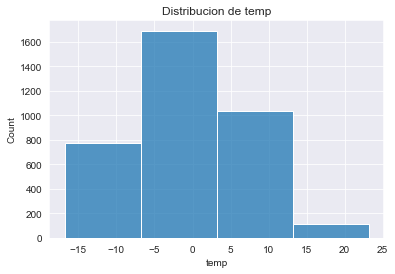

In [25]:
import seaborn as sns

sns.set_style("darkgrid")
plt.title("Distribucion de temp")
sns.histplot(data=df, x="temp", binwidth=10)


<AxesSubplot:title={'center':'Distribucion de dew_point'}, xlabel='dew_point', ylabel='Count'>

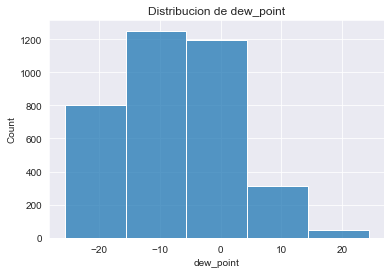

In [26]:
sns.set_style("darkgrid")
plt.title("Distribucion de dew_point")
sns.histplot(data=df, x="dew_point", binwidth=10)

<AxesSubplot:title={'center':'Distribucion de hum'}, xlabel='hum', ylabel='Count'>

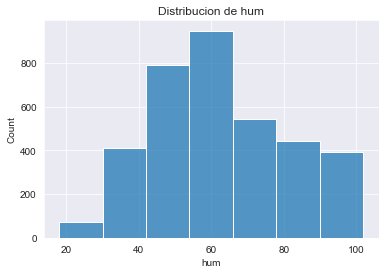

In [28]:
sns.set_style("darkgrid")
plt.title("Distribucion de hum")
sns.histplot(data=df, x="hum", binwidth=12)

<AxesSubplot:title={'center':'Distribucion de rain'}, xlabel='rain', ylabel='Count'>

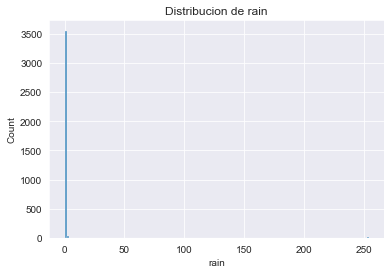

In [30]:
sns.set_style("darkgrid")
plt.title("Distribucion de rain")
sns.histplot(data=df, x="rain", binwidth=2)

el grafico anterior nos muestra que POSIBLEMENTE existen algunos pocos outliers, probablemente errores de medicion

<AxesSubplot:title={'center':'Distribucion de wind_dir'}, xlabel='wind_dir', ylabel='Count'>

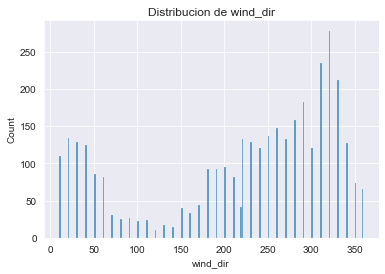

In [31]:
sns.set_style("darkgrid")
plt.title("Distribucion de wind_dir")
sns.histplot(data=df, x="wind_dir", binwidth=2)

<AxesSubplot:title={'center':'Distribucion de wind_speed'}, xlabel='wind_speed', ylabel='Count'>

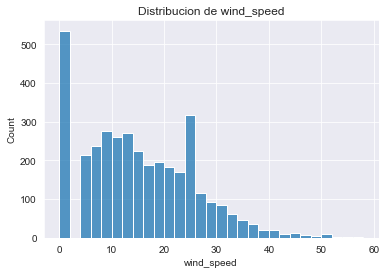

In [32]:
sns.set_style("darkgrid")
plt.title("Distribucion de wind_speed")
sns.histplot(data=df, x="wind_speed", binwidth=2)

<AxesSubplot:title={'center':'Distribucion de pres'}, xlabel='pres', ylabel='Count'>

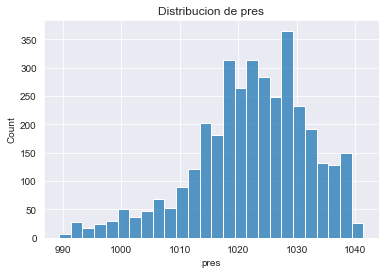

In [33]:
sns.set_style("darkgrid")
plt.title("Distribucion de pres")
sns.histplot(data=df, x="pres", binwidth=2)

Al parecer, la unica columna que posiblemente tiene outliers es rain
se investiga las columnas mas en produndidad, ordenando los valores de mayor a menor

In [36]:
df['rain'].sort_values(ascending=False).head(20)

1747    253.7
1853    253.7
1742    253.7
1723    253.7
1752    253.7
1820    253.7
1658    253.7
1697    253.7
1514    253.4
1019    253.2
720     253.2
3182    253.2
1740    253.2
2162    253.2
2461    253.2
1624    252.7
1679    251.7
3168      5.6
1005      4.3
811       4.1
Name: rain, dtype: float64

no es sencillo determinar si se trata de outliers, ya que estan por debajo del record historico de precipitacion por hora

https://es.wikipedia.org/wiki/Anexo:R%C3%A9cords_meteorol%C3%B3gicos_mundiales#:~:text=1%20hora%3A%20305%20mm%20%28en%2042%20minutos%29%20Holt,Estados%20Unidos%29%2C%2022%20de%20junio%20de%201947.%2065

Con lo cual son valores plausibles
